In [10]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from library import *


In [11]:
col = {"party":12, "fgm":5, "fga":4, "RidingNumber":2}
data = loadList("RidingWinners.csv")
LiberalCount = 0
NDPCount = 0
ConservativeCount = 0
BQCount = 0
GreenCount = 0
LiberalList = []
NDPList = []
ConservativeList = []
BQList = []
GreenList = []
RidingCountList = []
LiberalRidings = []
NDPRidings = []
ConservativeRidings = []
BQRidings = []
GreenRidings = []
RidingPalette = {"Liberal":"r", "Conservative":"b", "NDP":"orange", "BQ":"cyan", "Green":"green"}

In [12]:
for n in range (0,len(data)):
    if data[n][col["party"]][-1] == 'l':
        LiberalCount += 1
        LiberalList.append(data[n][col["RidingNumber"]])
    elif data[n][col["party"]][-1] == 'e':
        NDPCount += 1
        NDPList.append(data[n][col["RidingNumber"]])
    elif data[n][col["party"]][-1] == 'r':
        ConservativeCount += 1
        ConservativeList.append(data[n][col["RidingNumber"]])
    elif data[n][col["party"]][-1] == 's':
        BQCount += 1
        BQList.append(data[n][col["RidingNumber"]])
    else:
        GreenCount += 1
        GreenList.append(data[n][col["RidingNumber"]])

In [13]:
print(LiberalList)
print(ConservativeList)
print(NDPList)
print(BQList)
print(GreenList)


['10001', '10002', '10003', '10004', '10005', '10007', '11001', '11002', '11003', '11004', '12001', '12002', '12003', '12004', '12005', '12006', '12007', '12008', '12009', '12010', '13001', '13002', '13005', '13006', '13007', '13009', '24003', '24004', '24005', '24015', '24016', '24017', '24021', '24023', '24024', '24026', '24027', '24028', '24029', '24030', '24036', '24037', '24039', '24040', '24041', '24044', '24065', '24052', '24053', '24054', '24055', '24056', '24057', '24059', '24068', '24069', '24070', '24073', '24074', '24077', '24078', '35001', '35006', '35007', '35008', '35009', '35010', '35011', '35012', '35015', '35016', '35018', '35019', '35020', '35021', '35024', '35027', '35029', '35028', '35031', '35032', '35036', '35038', '35121', '35041', '35043', '35044', '35045', '35047', '35046', '35052', '35053', '35054', '35055', '35057', '35058', '35059', '35060', '35061', '35062', '35063', '35064', '35065', '35066', '35069', '35070', '35072', '35073', '35076', '35075', '35077', 

In [14]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure")


In [15]:
shp_path = "FED_CA_2019_EN.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

In [16]:
sns.pairplot(df, hue='FEDNUM', palette='Paired_r')

NameError: name 'df' is not defined

In [17]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [18]:
df = read_shapefile(sf)
df.shape

(347, 12)

In [19]:
sf.records()

[Record #0: [48019, 'Edmonton Strathcona', 'Edmonton Strathcona', 'AB', '20131005', '', '2013', 103183, 106066, 'http://www.elections.ca/res/cir/maps2/mapprov.asp?map=48019&lang=f#descrip', 'http://www.elections.ca/res/cir/maps2/mapprov.asp?map=48019&lang=e#descrip'],
 Record #1: [48020, 'Edmonton-Ouest', 'Edmonton West', 'AB', '20131005', '', '2013', 104422, 121869, 'http://www.elections.ca/res/cir/maps2/mapprov.asp?map=48020&lang=f#descrip', 'http://www.elections.ca/res/cir/maps2/mapprov.asp?map=48020&lang=e#descrip'],
 Record #2: [24023, 'Compton--Stanstead', 'Compton--Stanstead', 'QC', '20131005', '', '2013', 101946, 105459, 'http://www.elections.ca/res/cir/maps2/mapprov.asp?map=24023&lang=f#descrip', 'http://www.elections.ca/res/cir/maps2/mapprov.asp?map=24023&lang=e#descrip'],
 Record #3: [24026, 'Gaspésie--Les Îles-de-la-Madeleine', 'Gaspésie--Les Îles-de-la-Madeleine', 'QC', '20131005', '', '2013', 78833, 75850, 'http://www.elections.ca/res/cir/maps2/mapprov.asp?map=24026&lang=

In [20]:
sf.records()[3][0]



    

24026

In [21]:
for n in range(0, len(df)):
    if str(sf.records()[n][0]) in LiberalList:
        LiberalRidings.append(n)
    elif str(sf.records()[n][0]) in ConservativeList:
        ConservativeRidings.append(n)
    elif str(sf.records()[n][0]) in NDPList:
        NDPRidings.append(n)
    elif str(sf.records()[n][0]) in BQList:
        BQRidings.append(n)
    elif str(sf.records()[n][0]) in GreenList:
        GreenRidings.append(n)

print(LiberalRidings)
print(ConservativeRidings)
print(NDPRidings)
print(BQRidings)
print(GreenRidings)

[2, 3, 4, 5, 9, 10, 11, 12, 13, 16, 17, 21, 22, 26, 28, 31, 32, 33, 35, 36, 37, 39, 40, 41, 42, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 60, 61, 68, 69, 72, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 98, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 121, 136, 137, 138, 139, 148, 158, 159, 161, 164, 168, 169, 172, 175, 176, 178, 179, 182, 183, 184, 185, 186, 189, 193, 194, 195, 199, 200, 203, 204, 210, 212, 214, 215, 216, 224, 225, 226, 228, 229, 230, 231, 232, 234, 235, 236, 238, 240, 241, 242, 246, 247, 249, 250, 251, 253, 254, 262, 263, 266, 267, 268, 270, 274, 292, 297, 304, 308, 310, 311, 313, 314, 318, 319, 324, 329, 331, 335, 336, 339, 340, 343, 344, 345]
[1, 14, 15, 18, 19, 30, 34, 43, 55, 59, 62, 64, 65, 73, 75, 80, 94, 95, 96, 97, 100, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 142, 143, 144, 145, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 162, 165, 170, 171, 173, 174, 177

In [22]:
df.sample(347)

,FEDNUM,FRNAME,ENNAME,PROVCODE,CREADT,REVDT,REPORDER,DECPOPCNT,QUIPOPCNT,ENLEGALDSC,FRLEGALDSC,coords
131,47007,Regina--Lewvan,Regina--Lewvan,SK,20131005,,2013,79587,92426,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(5303467.194285713, 1679848.8600000031), (530..."
205,35074,Oshawa,Oshawa,ON,20131005,,2013,125771,126764,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(7262282.5, 957414.3114285767), (7261908.5, 9..."
56,35018,Davenport,Davenport,ON,20131005,,2013,102360,108473,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(7218965.20000001, 931371.2942857146), (72190..."
283,48026,Lethbridge,Lethbridge,AB,20131005,,2013,105999,117394,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(4707181.554285716, 1797900.0742857158), (470..."
83,35020,Don Valley-Nord,Don Valley North,ON,20131005,,2013,103073,110076,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(7224712.137142867, 947283.811428573), (72247..."
...,...,...,...,...,...,...,...,...,...,...,...,...
75,35056,Markham--Unionville,Markham--Unionville,ON,20131005,,2013,104693,123318,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(7221913.405714288, 949695.3228571415), (7221..."
2,24023,Compton--Stanstead,Compton--Stanstead,QC,20131005,,2013,101946,105459,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(7806174.340000011, 1312245.6000000052), (780..."
133,47009,Regina--Wascana,Regina--Wascana,SK,20131005,,2013,77208,84153,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(5313590.051428571, 1672123.0514285788), (531..."
259,59026,Esquimalt--Saanich--Sooke,Esquimalt--Saanich--Sooke,BC,20131005,20140619,2013,113004,120834,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"[(3918227.4000000022, 1950760.8399999999), (39..."


In [23]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [24]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


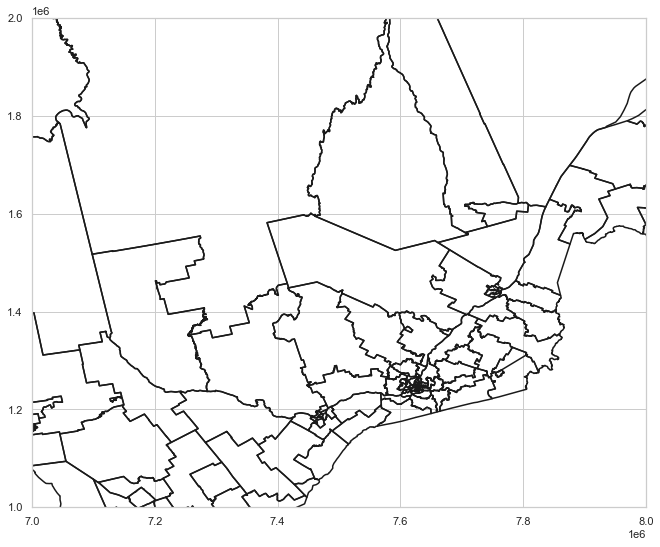

In [25]:
y_lim = (1000000,2000000) # latitude
x_lim = (7000000,8000000) # longitude
plot_map(sf, x_lim, y_lim)

<Figure size 792x648 with 0 Axes>

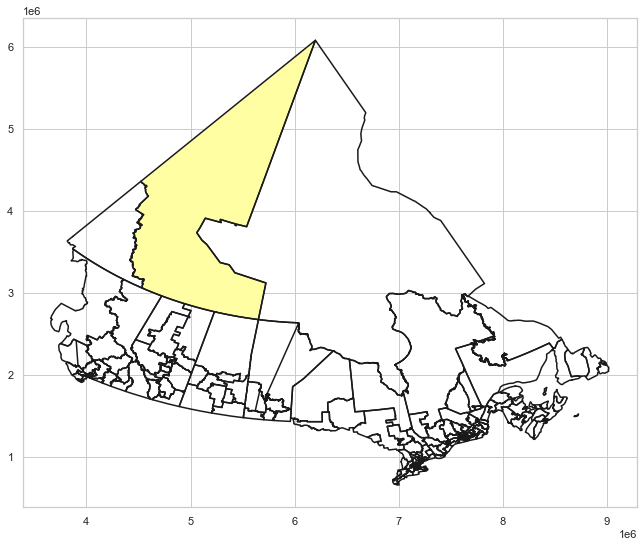

In [33]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
   
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#plot_map_fill(0, sf, x_lim, y_lim, color=’y’)
#plot_map_fill(251, sf,color='y')

<Figure size 792x648 with 0 Axes>

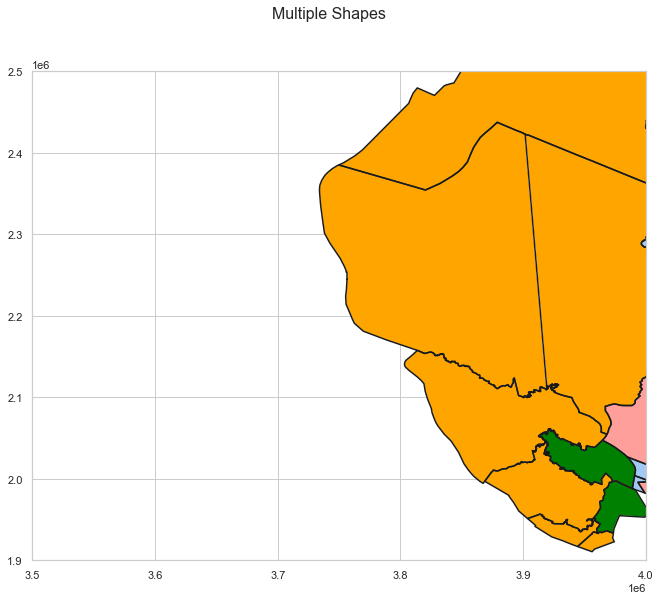

In [65]:
def plot_map_fill_multiples_ids(title, city, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = ''):
  
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    n = 0
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]

        ax.fill(x_lon,y_lat, c[n])
        n+=1
    
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
 #       plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

AllRidings = LiberalRidings + ConservativeRidings + NDPRidings + BQRidings + GreenRidings

c = []
for i in range(0, len(LiberalRidings)):
    c += ["r"]
for i in range(0, len(ConservativeRidings)):
    c += ["b"]
for i in range(0, len(NDPRidings)):
    c += ["orange"]
for i in range(0, len(BQRidings)):
    c += ["c"]
for i in range(0, len(GreenRidings)):
    c += ["green"]
plot_map_fill_multiples_ids("Multiple Shapes",
AllRidings, sf, y_lim = (1900000,2500000),
x_lim = (3500000,4000000), color = c)


In [35]:
# plotting the city on the map to be coloured by using the dist_name
def plot_cities_2(sf, title, cities, color):
    
    df = read_shapefile(sf)
    city_id = []
    for i in cities:
        city_id.append(df[df.ENNAME == i.upper()]
                         .index.get_values()[0])
    plot_map_fill_multiples_ids(title, city_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

In [41]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [42]:
def plot_cities_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    city_id = []
    for i in cities:
        city_id.append(df[df.ENNAME == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


1: 100 => 265

2: 266 => 365

3: 366 => 499

4: 500 => 599

5: 600 => 1999

6: 2000 => 399999


   1   2   3   4   5   6


AttributeError: 'Int64Index' object has no attribute 'get_values'

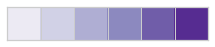

In [43]:
names= ["jaipur","bikaner","churu","bhilwara","udaipur"]
data = [100, 2000, 300, 400000, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600]
print_id = True # The shape id will be printed
color_pallete = 1 # ‘Purple’
plot_cities_data(sf, "Heat map of given cities", names, data, color_pallete, print_id)

In [47]:
# reading data set
census_17 = df.POPULATION
census_17.shape
#plotting
title = "Riding Winners in Canada’
data = census_17
names = df.ENNAME
plot_cities_data(sf, title, names, data, 1, True)

AttributeError: 'DataFrame' object has no attribute 'POPULATION'